## Importing Libraries

In [10]:
!pip install statsmodels

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Loading Data

In [14]:
data=pd.read_csv('multiple_linear_regression.csv')

In [15]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Data Preprocessing

### Handling Null Values

In [17]:
data=data.dropna()

In [18]:
data.shape

(200, 4)

### Splitting Data

In [21]:
output_col='Target'

In [22]:
x=data.iloc[:, data.columns!=output_col]
# x=data.iloc[:, [0,1]]

In [23]:
y=data.loc[:, output_col]

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.30, random_state=43)

In [25]:
x_train

,Feature 1,Feature 2,Feature 3
24,62.3,12.6,18.3
70,199.1,30.6,38.7
182,56.2,5.7,29.7
131,265.2,2.9,43.0
23,228.3,16.9,26.2
52,216.4,41.7,39.6
106,25.0,11.0,29.7
193,166.8,42.0,3.6
156,93.9,43.5,50.5
99,135.2,41.7,45.9


## Linear Regression

### Training Model

In [26]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [27]:
lr.coef_

array([ 0.04104469,  0.19645191, -0.01350548])

In [28]:
lr.intercept_

4.099930986857787

### Predicting Test_Input

In [29]:
predicted_value=lr.predict(x_test)

In [30]:
from sklearn.metrics import mean_squared_error
cost=mean_squared_error(y_test, predicted_value)

In [31]:
cost

3.3300383152160253

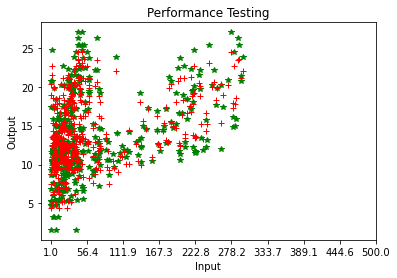

In [32]:
plt.plot(x_test, y_test, "*", color="green")
plt.plot(x_test, predicted_value, "+", color='red')
plt.title("Performance Testing")
plt.xlabel("Input")
plt.xticks(np.linspace(1,500,10))
plt.ylabel("Output")
plt.show()

## Linear Regression with OLS Summary

In [33]:
x_with_constant=sm.add_constant(x_train)
print(x_with_constant)

     const  Feature 1  Feature 2  Feature 3
24     1.0       62.3       12.6       18.3
70     1.0      199.1       30.6       38.7
182    1.0       56.2        5.7       29.7
131    1.0      265.2        2.9       43.0
23     1.0      228.3       16.9       26.2
52     1.0      216.4       41.7       39.6
106    1.0       25.0       11.0       29.7
193    1.0      166.8       42.0        3.6
156    1.0       93.9       43.5       50.5
99     1.0      135.2       41.7       45.9
163    1.0      163.5       36.8        7.4
7      1.0      120.2       19.6       11.6
27     1.0      240.1       16.7       22.9
74     1.0      213.4       24.6       13.1
196    1.0       94.2        4.9        8.1
154    1.0      187.8       21.1        9.5
118    1.0      125.7       36.9       79.2
157    1.0      149.8        1.3       24.3
153    1.0      171.3       39.7       37.7
3      1.0      151.5       41.3       58.5
104    1.0      238.2       34.3        5.3
47     1.0      239.9       41.5

In [34]:
model=sm.OLS(y_train, x_with_constant)
result=model.fit()
result.params
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     170.4
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           4.04e-28
Time:                        16:24:54   Log-Likelihood:                -113.08
No. Observations:                  60   AIC:                             234.2
Df Residuals:                      56   BIC:                             242.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0999      0.585      7.012      0.0